In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Deep Learning (TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [5]:
# Load the dataset
df = pd.read_csv(r"E:\adult 3.csv")# Use your cleaned file name

In [6]:
# Define the target column
target_col = 'income_>50K'  # binary classification: 1 if >50K, 0 otherwise

In [10]:
X = df.drop('income', axis=1)
y = df['income']
# Convert target variable to binary
y = y.apply(lambda x: 1 if x == '>50K' else 0)
# Separate features and target before encoding
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [11]:
# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)
print("Shape after encoding:", X.shape)
print("Sample columns:\n", X.columns[:10])


Shape after encoding: (48842, 100)
Sample columns:
 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shape
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (39073, 100)
Test set shape: (9769, 100)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [14]:
# Dictionary to store results
ml_results = {}

In [15]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

In [24]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    ml_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

C:\Users\User\.conda\envs\salaryml\lib\site-packages\xgboost\training.py:183: UserWarning: [14:10:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
# Display results
results_df = pd.DataFrame(ml_results).T.sort_values(by="Accuracy", ascending=False)
print("\nML Model Performance Comparison:\n")
print(results_df)


ML Model Performance Comparison:

                     Accuracy  Precision    Recall  F1 Score
XGBoost              0.875934   0.792012  0.653122  0.715893
Random Forest        0.855052   0.731891  0.622327  0.672677
Logistic Regression  0.846965   0.729700  0.572712  0.641745
Decision Tree        0.818815   0.617065  0.640291  0.628463
SVM                  0.800389   0.964115  0.172370  0.292453
Naive Bayes          0.797216   0.664213  0.308811  0.421606
K-Nearest Neighbors  0.780223   0.567587  0.343028  0.427619


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [28]:
# Define the model
dl_model = Sequential()
dl_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
dl_model.add(Dropout(0.3))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.3))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))  # Binary output


In [29]:
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8088 - loss: 0.4160 - val_accuracy: 0.8528 - val_loss: 0.3203
Epoch 2/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8443 - loss: 0.3359 - val_accuracy: 0.8584 - val_loss: 0.3102
Epoch 3/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8516 - loss: 0.3226 - val_accuracy: 0.8573 - val_loss: 0.3089
Epoch 4/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8499 - loss: 0.3205 - val_accuracy: 0.8597 - val_loss: 0.3042
Epoch 5/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8508 - loss: 0.3192 - val_accuracy: 0.8599 - val_loss: 0.3068
Epoch 6/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8568 - loss: 0.3086 - val_accuracy: 0.8604 - val_loss: 0.3022
Epoch 7/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8565 - loss: 0.3110 - val_accuracy: 0.8626 - val_loss: 0.3050
Epoch 8/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8612 - loss: 0.3024 - val_accuracy: 0

In [31]:
# Predict probabilities and convert to binary
y_pred_dl_prob = dl_model.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int)

# Evaluate
print("\nDeep Learning Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Precision:", precision_score(y_test, y_pred_dl))
print("Recall:", recall_score(y_test, y_pred_dl))
print("F1 Score:", f1_score(y_test, y_pred_dl))


306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Deep Learning Model Performance:
Accuracy: 0.8608864776333299
Precision: 0.7289719626168224
Recall: 0.6471615720524018
F1 Score: 0.6856349757113116


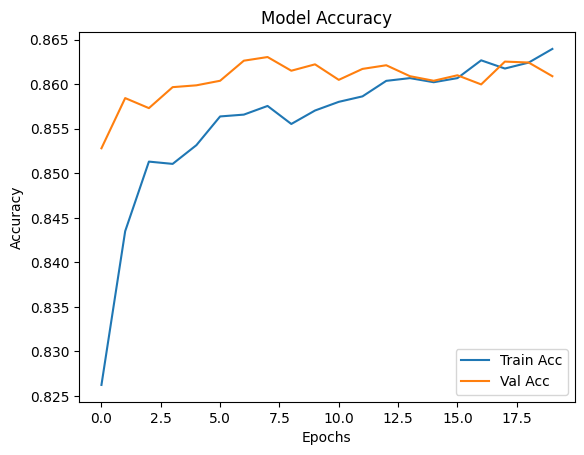

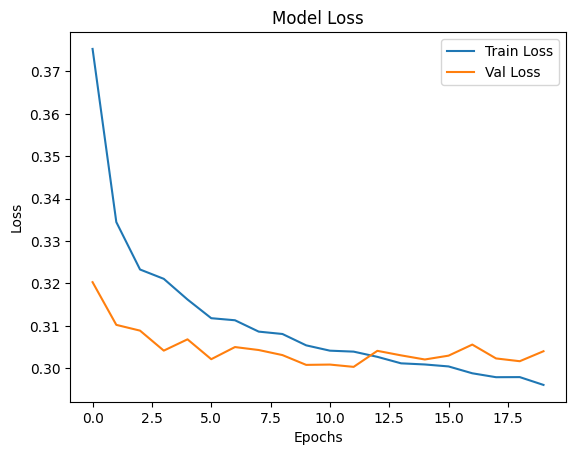

In [32]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


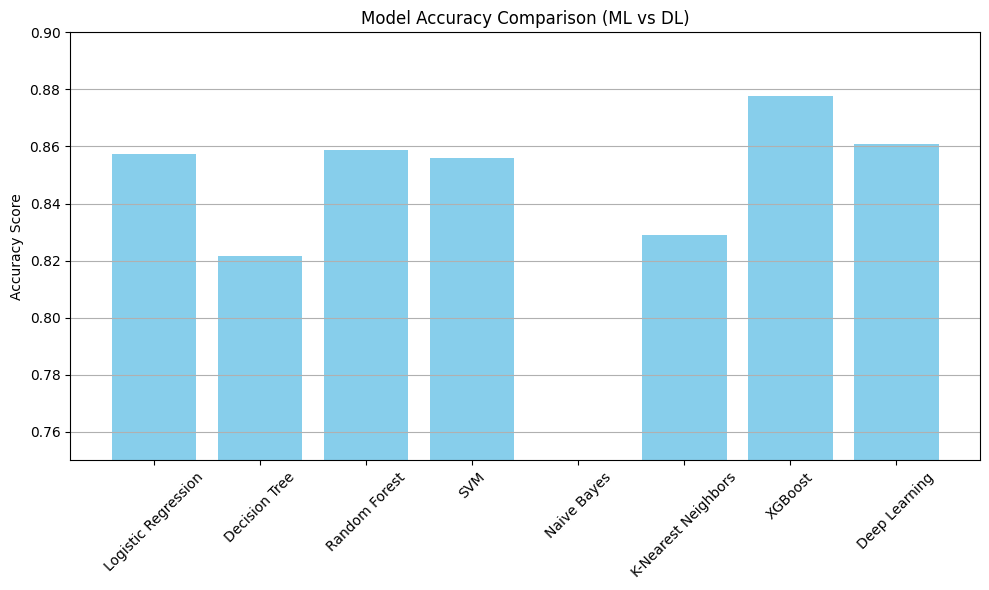

In [36]:
import matplotlib.pyplot as plt

# Extract accuracy from ml_results
accuracy_results = {name: scores['Accuracy'] for name, scores in ml_results.items()}#hi mam i am MUHILPIRASATH R FROM SONA COLLEGE OF TECHNOLOGY

# Add DL accuracy manually
accuracy_results['Deep Learning'] = 0.8608864776333299

# Plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison (ML vs DL)')
plt.xticks(rotation=45)
plt.ylim(0.75, 0.9)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [37]:
# Find best ML model
best_model_name = max(ml_results, key=lambda x: ml_results[x]['Accuracy'])
best_model = models[best_model_name]

# Save best ML model
import joblib
joblib.dump(best_model, f'best_model_{best_model_name}.pkl')
print(f"Best ML model ({best_model_name}) saved as best_model_{best_model_name}.pkl")


Best ML model (XGBoost) saved as best_model_XGBoost.pkl


In [39]:
accuracy_results = {
    "XGBoost": ml_results["XGBoost"]["Accuracy"],
    "Random Forest": ml_results["Random Forest"]["Accuracy"],
    "Logistic Regression": ml_results["Logistic Regression"]["Accuracy"],
    "Decision Tree": ml_results["Decision Tree"]["Accuracy"],
    "SVM": ml_results["SVM"]["Accuracy"],
    "Naive Bayes": ml_results["Naive Bayes"]["Accuracy"],
    "K-Nearest Neighbors": ml_results["K-Nearest Neighbors"]["Accuracy"],
    "Deep Learning":0.8608864776333299   # your deep learning model's accuracy
}


In [40]:
best_model_name = max(accuracy_results, key=accuracy_results.get)
print(f"Best performing model: {best_model_name} with accuracy: {accuracy_results[best_model_name]:.4f}")


Best performing model: XGBoost with accuracy: 0.8777


In [41]:
if best_model_name == "Deep Learning":
    model.save("best_model_deep_learning.h5")
    print("Deep Learning model saved as best_model_deep_learning.h5")
else:
    best_ml_model = models[best_model_name]
    best_ml_model.fit(X_train_scaled, y_train)
    joblib.dump(best_ml_model, f"best_model_{best_model_name}.pkl")
    print(f"{best_model_name} saved as best_model_{best_model_name}.pkl")


C:\Users\User\.conda\envs\salaryml\lib\site-packages\xgboost\training.py:183: UserWarning: [14:24:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost saved as best_model_XGBoost.pkl
